In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

In [3]:
# missing 201500 201700 201800 201810
#               201510       201520       201600       201610      201620      201710      201720      201820
# academic_periods = [201510, 201520, 201600, 201610, 201620, 201710, 201720, 201820]

for wave in range(1, 2):
    print('Wave: ', wave)
    data = pd.read_csv(f'../../../final_data/activity_sleep_survey_grade/activity_sleep_survey_grade_{wave}.csv')

    train_data = pd.get_dummies(data.drop(['egoid', 'FinalGrade', 'CourseReferenceNumber'], axis=1))

    train_features, test_features, train_labels, test_labels = train_test_split(train_data, data['FinalGrade'], test_size = 0.25, random_state = 42)

    clf = RandomForestClassifier(n_estimators=1000, random_state=33, oob_score=True)
    clf.fit(train_features, train_labels)

    print(classification_report(test_labels, clf.predict(test_features)))

Wave:  1
              precision    recall  f1-score   support

           A       0.53      0.66      0.59     10469
          A-       0.24      0.21      0.23      4887
           B       0.11      0.09      0.10      1824
          B+       0.13      0.09      0.10      2486
          B-       0.07      0.05      0.06       635
           C       0.03      0.01      0.02       304
          C+       0.05      0.03      0.04       388
          C-       0.17      0.20      0.18        85
           S       0.12      0.06      0.08      1070

    accuracy                           0.38     22148
   macro avg       0.16      0.16      0.15     22148
weighted avg       0.34      0.38      0.36     22148



In [4]:
feature_imp = pd.Series(clf.feature_importances_, index = train_data.columns).sort_values(ascending = True)
feature_imp

daddec_1                                         0.000000
momdec_1                                         0.000000
AcademicPeriod                                   0.000000
usedrugs_prescr_1_Less than 1-2 times a month    0.000031
exercise_1_0                                     0.000051
                                                   ...   
timeoutofbed                                     0.023634
timetobed                                        0.023785
efficiency                                       0.023994
lowrangecal                                      0.024027
meanrate                                         0.024271
Length: 204, dtype: float64

In [5]:
count_val = 0; counter = 0

for feature, value in feature_imp.items():
    count_val += value
    counter += 1
    if count_val >= 0.80:
        print(feature, counter)
        break

sedentaryminutes 196


In [29]:
colors = ['#66afe9', '#66afe9', '#144281', '#144281', '#144281', '#66afe9', '#66afe9', '#66afe9', '#66afe9', '#66afe9', '#66afe9', '#144281', '#144281', '#66afe9', '#144281', '#66afe9', '#66afe9', '#66afe9', '#66afe9', '#144281']

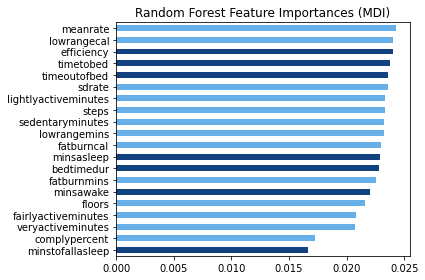

In [30]:
ax = feature_imp[-20:].plot.barh(color= [ elem for elem in reversed(colors) ])
ax.set_title("Random Forest Feature Importances (MDI)")
ax.figure.tight_layout()